<a href="https://colab.research.google.com/github/yelynn99/bigpie_project/blob/master/gradient_descent-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [0]:
plt.style.use(['ggplot']) 

In [0]:
X = 2 * np.random.rand(100, 1) 
y = 5 +6 * X+np.random.randn(100, 1) 
_x = np.arange(0, 2, 0.01) 
_y = [5 + 6*v for v in _x] 

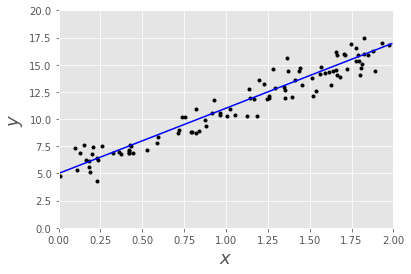

In [0]:
plt.plot(X,y,'b.', color = 'black') 
plt.plot(_x, _y, 'b', color = 'blue') 
plt.xlabel("$x$", fontsize=18) 
plt.ylabel("$y$", fontsize=18) 
_ =plt.axis([0,2,0,20]) 

In [0]:
X_b = np.c_[np.ones((100,1)),X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [0]:
X_new = np.array([[0],[2]]) 
X_new_b = np.c_[np.ones((2,1)),X_new] 
y_predict = X_new_b.dot(theta_best) 

(0.0, 2.0, 0.0, 20.0)

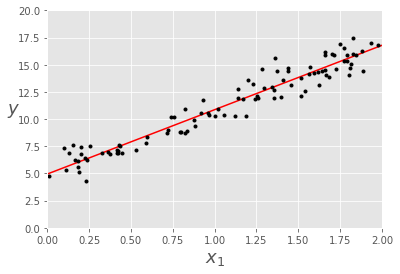

In [0]:
plt.plot(X_new,y_predict,'r-') 
plt.plot(X,y,'b.', color = 'black') 
plt.xlabel("$x_1$", fontsize=18) 
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.axis([0,2,0,20])

In [0]:
 def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta) 
    cost = (1/2*m) * np.sum(np.square(predictions-y)) 
    return cost 



In [0]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100): 
  m = len(y) 
  cost_history = np.zeros(iterations) 
  theta_history = np.zeros((iterations,2)) 
  
  for it in range(iterations): 
    prediction = np.dot(X,theta) 
    theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y))) 
    theta_history[it,:] =theta.T 
    cost_history[it] = cal_cost(theta,X,y) 
  
  return theta, cost_history, theta_history 


In [0]:
lr =0.01 
n_iter = 1000 

theta = np.random.randn(2,1) 

X_b = np.c_[np.ones((len(X),1)),X] 
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

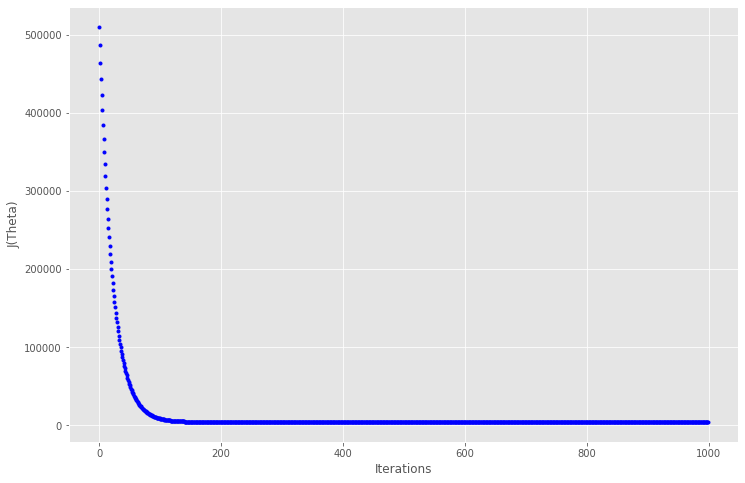

In [0]:
fig,ax = plt.subplots(figsize=(12,8)) 

ax.set_ylabel('J(Theta)') 
ax.set_xlabel('Iterations') 
_=ax.plot(range(n_iter),cost_history,'b.') 

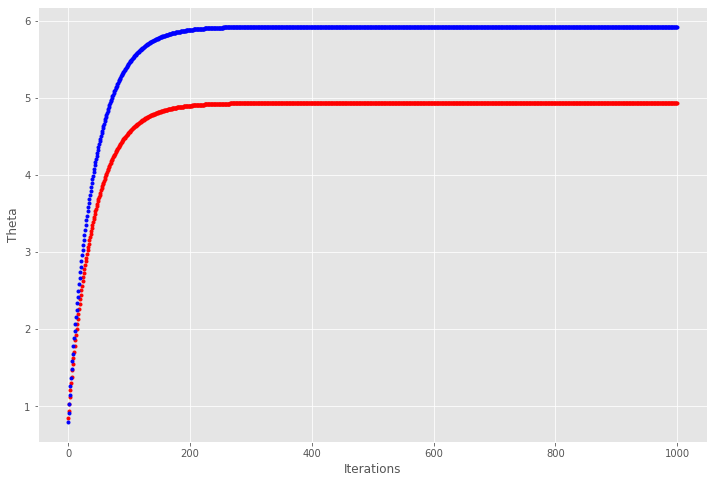

In [0]:
fig,ax = plt.subplots(figsize=(12,8)) 

theta0_history = [] 
theta1_history = [] 

for it in range(n_iter): 
  theta0_history.append(theta_history[it][0]) 
  theta1_history.append(theta_history[it][1]) 

ax.set_ylabel('Theta') 
ax.set_xlabel('Iterations') 
_=ax.plot(range(n_iter),theta0_history,'b.', color = 'red')
_=ax.plot(range(n_iter),theta1_history,'b.', color = 'blue')